In [1]:
import pandas as pd
import numpy as np
from neo4j import GraphDatabase
import graph_model as gm
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
uri = "bolt://3.220.233.169:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "i-0e23d19f0d8795714"))

In [4]:
with driver.session() as session:
    result = session.run('\
    MATCH (u:User)-->(r:Review)-->(b:Business)-->(:City)-->(s:State {name:"IL"})\
    RETURN u.id, r.stars, b.id')

In [5]:
IL_reviews=pd.DataFrame(result.values())

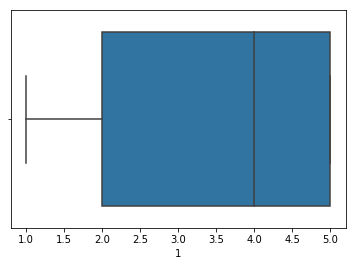

In [10]:
sns.boxplot(IL_reviews[1])

In [44]:
business_reviews.head()

,1
2,
9MnbQg7kfb_WgxoV0hXKSQ,3625.0
-fiUXzkxRfbHY9TKWwuptw,2414.0
VIJ2KiDKhUVhhpNylEIfog,2394.0
t_yiQnxUDdPPCN2z4QyezA,1800.0
-zEpEmDfFQL-ph0N3BDlXA,1724.0


In [45]:
user_reveiws.head()

,1
0,
pFRE2mNCQvx9DUU542c6Dw,686.0
qntQp9UoeP6ju8D_W0Y0cw,673.0
xN-xoLhTHUFfTS_BMGG0xg,528.0
qmjoMFMZdLH69_6eGTGDZw,511.0
VVimjPD7f8O5D1fhy5vSpw,494.0


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


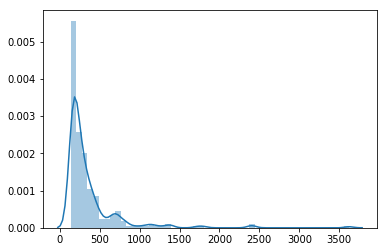

In [32]:
sns.distplot(business_reviews[0:250])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


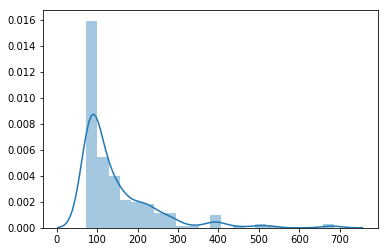

In [33]:
sns.distplot(user_reveiws[0:])

In [61]:
top250=IL_reviews.merge(business_reviews[0:250], how='inner', left_on=2, right_index=True)

In [60]:
top250.shape

(42378, 4)